##Task 6 : Prediction using Decision Tree Algorithm!
##GRIP @ The Sparks Foundation
##Target : Create the decision Tree Classifier and Visualise it graficllay.
##Author : Zeineb REJEB

### Importing Librairies and Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings as wg
wg.filterwarnings("ignore")

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
data['Species'] = iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Statistical description

In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates().shape

(149, 5)

In [10]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the dataset

<Axes: >

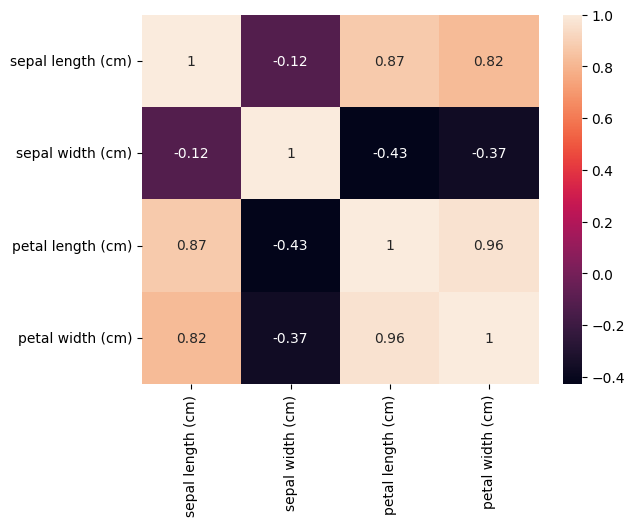

In [11]:
sns.heatmap(data.corr(),annot=True)

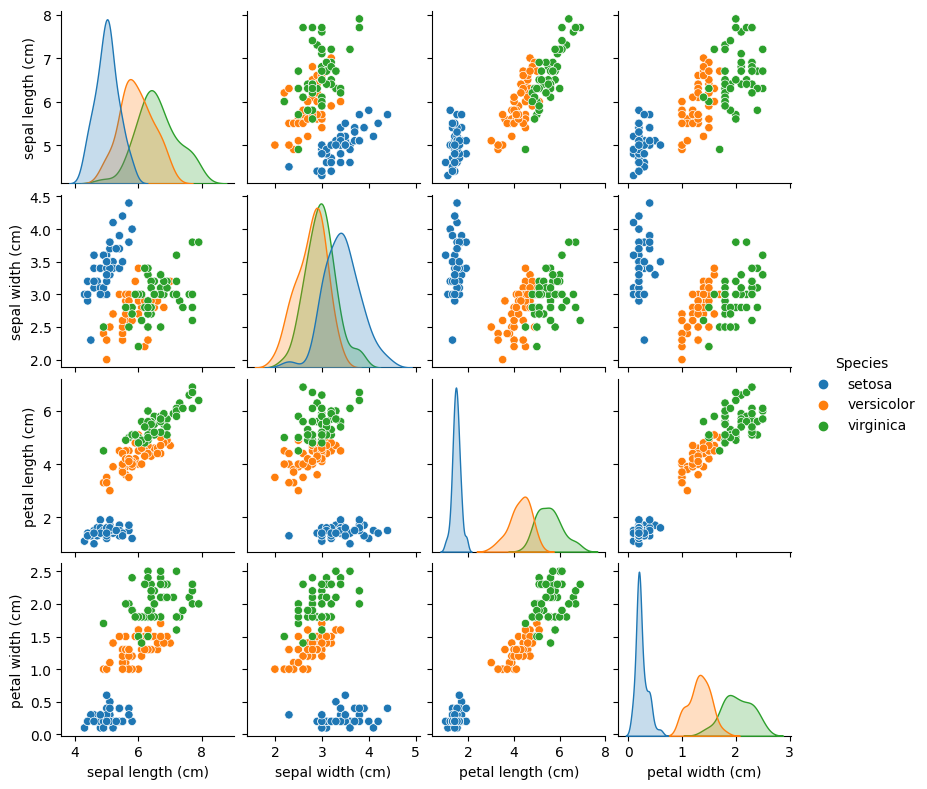

In [12]:
sns.pairplot(data, hue='Species', height=2)
plt.show()



1. Petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).

2. Iris-Setosa seems to have smaller petal length and petal width as compared to others.



In [13]:
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

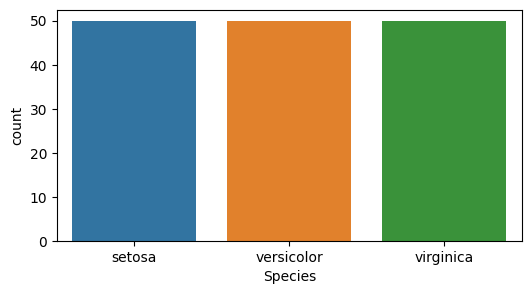

In [14]:
plt.figure(figsize = (6,3))
sns.countplot(x = data['Species'])

### Training the model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,-1], test_size=0.2, random_state=50)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Training Complete.")

Training Complete.


In [16]:
x_train.shape

(120, 4)

In [17]:
x_test.shape

(30, 4)

In [18]:
y_pred = model.predict(x_test)

In [19]:
model.score(x_train,y_train)

1.0

Training set is taken 20% of total dataset. So, the score of training dataset will be 1.

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
88,versicolor,versicolor
72,versicolor,versicolor
20,setosa,setosa
16,setosa,setosa
147,virginica,virginica
140,virginica,virginica
113,virginica,virginica
23,setosa,setosa
12,setosa,setosa
68,versicolor,versicolor


### Classification Report

In [21]:
y_pred=model.predict(x_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [22]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 0.9666666666666667


In [23]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

<Axes: >

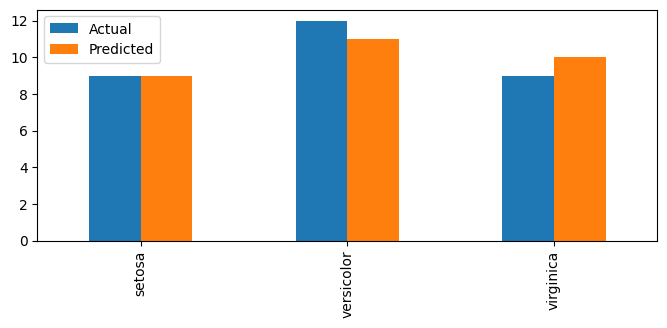

In [24]:
plt.rcParams["figure.figsize"] = [8,3]
dataf = pd.DataFrame({'Actual' : df['Actual'].value_counts(), 'Predicted' : df['Predicted'].value_counts()})
dataf.plot(kind = 'bar')

### Visualizing Decision Tree

[Text(0.4, 0.9166666666666666, 'Petal Width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'Petal Width (cm) <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'Petal Length (cm) <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'Petal Width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.25, 'Sepal Length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.5, 0.08333333333333333, '

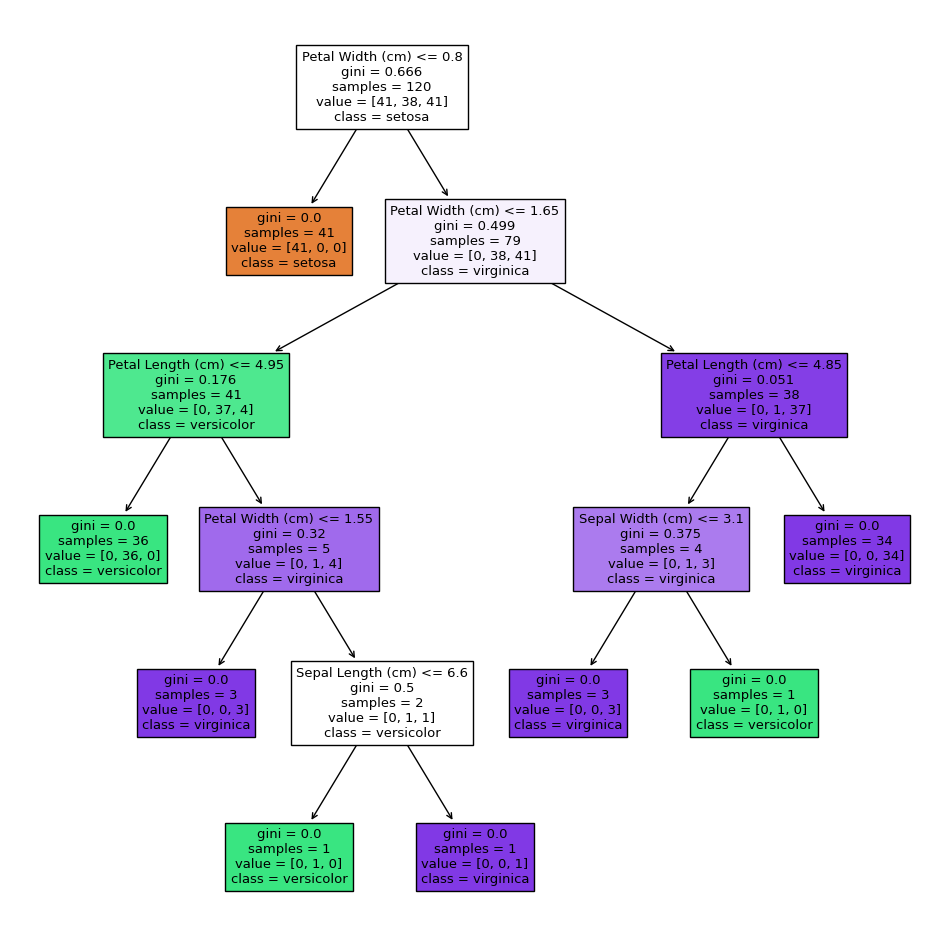

In [25]:
plt.figure(figsize=(12,12))
Features_Name = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
Class_Name = ['setosa','versicolor','virginica']
plot_tree(model,feature_names = Features_Name,class_names=Class_Name,filled = True)

In [26]:
print('Predicting with random test data: ',model.predict([[4.7, 3.2, 1.3, 0.2]]))

Predicting with random test data:  ['setosa']


In [27]:
model.score(x_test,y_test)

0.9666666666666667

The model's accuracy score with 96.67% accuracy

## Thank you!